# Customer_churn

# Problem statement 

To develop a predictive model that accurately identifies customers at high risk of churn based on historical data and customer behavior patterns. By leveraging machine learning techniques, the goal is to proactively implement retention strategies to minimize customer attrition and optimize customer lifetime value.

## Data collection
This data was provided by phoenix analytics

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
sns.set(font_scale=1.5)

In [2]:
data = pd.read_csv('dataset.csv')
data

,order_id,customer_number,transaction_date,description,total_qty,net_total,loyalty_amount,loyalty_points,discount_amount,customer_group,territory,delivery_date,delivery_window_end_time,delivery_window_start_time,set_warehouse,duka_latitude,duka_longitude
0,04aeddd4-d9b3-4cca-ab3b-072ca177a3e1,ID_172101,28/03/2022,Steam Energy Energy Drink 400ML CARTON (1.0 Item),6,2231.57,0,0,66.38,Individual,Meru,29/03/2022,19:00:00,13:00:00,Meru Main - KDKE,0.036784,37.654155
1,04aeddd4-d9b3-4cca-ab3b-072ca177a3e1,ID_172101,28/03/2022,Sumo Candles 8PC CARTON (12.0 Outers),6,2231.57,0,0,66.38,Individual,Meru,29/03/2022,19:00:00,13:00:00,Meru Main - KDKE,0.036784,37.654155
2,04aeddd4-d9b3-4cca-ab3b-072ca177a3e1,ID_172101,28/03/2022,Rhino Matches Kubwa 10 Boxes OUTER (1.0 Item),6,2231.57,0,0,66.38,Individual,Meru,29/03/2022,19:00:00,13:00:00,Meru Main - KDKE,0.036784,37.654155
3,4da580db-3b2c-4dff-a181-9c1341e05ea5,ID_172101,12/03/2022,Dawn Tissue Rolls Smart 40PC BALE (1.0 Bale),5,3637.91,0,0,38.53,Individual,Meru,14/03/2022,14:00:00,08:00:00,Meru Main - KDKE,0.036784,37.654155
4,4da580db-3b2c-4dff-a181-9c1341e05ea5,ID_172101,12/03/2022,Sawa Bath Soap 125G White DOZEN (1.0 Dzn),5,3637.91,0,0,38.53,Individual,Meru,14/03/2022,14:00:00,08:00:00,Meru Main - KDKE,0.036784,37.654155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43713,4802cfab-74e0-4813-8b1f-2931f068f65f,ID_066466,15/03/2022,Camel Maize Flour 1KG BALE (20.0 PC),2,1194.83,0,0,14.00,Individual,Karatina,16/03/2022,14:00:00,08:00:00,Karatina Main - KDKE,-0.564060,37.074678
43714,5ff62a4e-d369-4e50-b049-9a1021792241,ID_066466,21/02/2022,Local White Sugar 50KG BAG (1.0 Item),4,6874.52,0,0,80.55,Individual,Karatina,22/02/2022,14:00:00,08:00:00,Karatina Main - KDKE,-0.564060,37.074678
43715,5ff62a4e-d369-4e50-b049-9a1021792241,ID_066466,21/02/2022,Dawn Pekee Tissue Rolls Jumbo BALE (1.0 Item),4,6874.52,0,0,80.55,Individual,Karatina,22/02/2022,14:00:00,08:00:00,Karatina Main - KDKE,-0.564060,37.074678
43716,5ff62a4e-d369-4e50-b049-9a1021792241,ID_066466,21/02/2022,Dawn Pekee Tissue Rolls 40PC BALE (1.0 Item),4,6874.52,0,0,80.55,Individual,Karatina,22/02/2022,14:00:00,08:00:00,Karatina Main - KDKE,-0.564060,37.074678


In [3]:
data.shape

(43718, 17)

In [4]:
print(data.columns)

Index(['order_id', 'customer_number', 'transaction_date', 'description',
       'total_qty', 'net_total', 'loyalty_amount', 'loyalty_points',
       'discount_amount', 'customer_group', 'territory', 'delivery_date',
       'delivery_window_end_time', 'delivery_window_start_time',
       'set_warehouse', 'duka_latitude', 'duka_longitude'],
      dtype='object')


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43718 entries, 0 to 43717
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   order_id                    43718 non-null  object 
 1   customer_number             43718 non-null  object 
 2   transaction_date            43718 non-null  object 
 3   description                 43718 non-null  object 
 4   total_qty                   43718 non-null  int64  
 5   net_total                   43718 non-null  float64
 6   loyalty_amount              43718 non-null  int64  
 7   loyalty_points              43718 non-null  int64  
 8   discount_amount             43718 non-null  float64
 9   customer_group              43718 non-null  object 
 10  territory                   43718 non-null  object 
 11  delivery_date               43718 non-null  object 
 12  delivery_window_end_time    43718 non-null  object 
 13  delivery_window_start_time  437

In [6]:
#Have a quick look at the data
for column in data.columns:
  print(column)
  print(data[column].value_counts())
  print('-'*50)

order_id
28066c6f-6d8d-4498-a61b-bd448ed0e2a1    35
c44ca233-ea1e-404c-a987-b782231aeb96    32
c9d4adce-2fd9-413b-bf5a-d769088e692c    26
48e31c5c-1967-4d83-a8d1-46d59997a0e3    23
d3cc0686-3ea0-461c-9c23-1aeafec8304e    22
                                        ..
8e1b821b-ac26-48f6-b076-c398ee12962f     1
488ba8e6-b5e3-49e1-8647-c386c9e897a1     1
9a335b52-e67f-4a70-b95d-e04a6a0284f9     1
d4b41a61-be45-491b-a8fc-8702d7b6d635     1
8c473805-90e1-4f03-89ce-751c392a9cee     1
Name: order_id, Length: 20607, dtype: int64
--------------------------------------------------
customer_number
ID_164579    159
ID_006921    142
ID_178264    128
ID_186105    125
ID_089856    118
            ... 
ID_005040      1
ID_031876      1
ID_005677      1
ID_040605      1
ID_079394      1
Name: customer_number, Length: 3397, dtype: int64
--------------------------------------------------
transaction_date
21/03/2022    1770
14/03/2022    1628
01/03/2022    1499
28/03/2022    1466
28/02/2022    1399
22/03/2

In [7]:
data.isnull().sum()

order_id                      0
customer_number               0
transaction_date              0
description                   0
total_qty                     0
net_total                     0
loyalty_amount                0
loyalty_points                0
discount_amount               0
customer_group                0
territory                     0
delivery_date                 0
delivery_window_end_time      0
delivery_window_start_time    0
set_warehouse                 0
duka_latitude                 0
duka_longitude                0
dtype: int64

There are no missing values in the dataset

In [8]:
data.duplicated().sum()

10

In [9]:
#dropping the duplicated columns
data.drop_duplicates(inplace=True)

In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
total_qty,43708.0,6.601354,13.363069,1.000000,2.000000,4.000000,7.000000,5.000000e+02
net_total,43708.0,10463.884724,30236.794804,181.030000,2556.035000,4864.660000,9483.705000,1.379599e+06
loyalty_amount,43708.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
loyalty_points,43708.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
discount_amount,43708.0,178.736098,496.701172,0.000000,35.600000,72.700000,155.212500,2.023125e+04
duka_latitude,43708.0,-1.218989,1.066393,-4.289833,-1.314316,-1.218128,-0.628575,8.851695e-01
duka_longitude,43708.0,36.898718,1.130638,34.455751,36.715435,36.905558,37.023091,4.012190e+01


In [11]:
data.describe(include='object').T

,count,unique,top,freq
order_id,43708,20607,28066c6f-6d8d-4498-a61b-bd448ed0e2a1,35
customer_number,43708,3397,ID_164579,159
transaction_date,43708,51,21/03/2022,1770
description,43708,487,Local White Sugar 50KG BAG (1.0 Item),4213
customer_group,43708,2,Individual,43596
territory,43708,19,Kawangware,4270
delivery_date,43708,44,21/03/2022,1662
delivery_window_end_time,43708,7,19:00:00,22657
delivery_window_start_time,43708,5,13:00:00,22782
set_warehouse,43708,19,Kawangware Main - KDKE,4270


In [12]:
data.apply(lambda x: len(x.unique()))

order_id                      20607
customer_number                3397
transaction_date                 51
description                     487
total_qty                        88
net_total                     10784
loyalty_amount                    1
loyalty_points                    1
discount_amount                6446
customer_group                    2
territory                        19
delivery_date                    44
delivery_window_end_time          7
delivery_window_start_time        5
set_warehouse                    19
duka_latitude                  3343
duka_longitude                 3258
dtype: int64

##### Creating the churn column 
We will assume that clients who have stayed for more than 20 days without a purchase have churned and the rest have not churned 

In [13]:
data['transaction_date'] = pd.to_datetime(data['transaction_date'])
data['delivery_date'] = pd.to_datetime(data['delivery_date'])
data['delivery_window_end_time'] = pd.to_datetime(data['delivery_window_end_time'])
data['delivery_window_start_time'] = pd.to_datetime(data['delivery_window_start_time'])

In [14]:
from datetime import datetime
import pandas as pd

# latest transaction date in our dataset
latest_date = data['transaction_date'].max()

# Set the churn threshold to 20 days before the latest transaction date
churn_threshold = latest_date - pd.DateOffset(days=20)

# Find the last purchase date for each customer
last_purchase = data.groupby('customer_number')['transaction_date'].max()

# Label customers as churned if their last purchase was before the churn threshold
data['churn_status'] = data['customer_number'].apply(lambda x: 1 if last_purchase[x] < churn_threshold else 0)


In [15]:
data['churn_status'].value_counts()

1    34683
0     9025
Name: churn_status, dtype: int64

In [18]:
my_sub = data[['customer_number','churn_status']]
my_sub 

,customer_number,churn_status
0,ID_172101,0
1,ID_172101,0
2,ID_172101,0
3,ID_172101,0
4,ID_172101,0
...,...,...
43713,ID_066466,1
43714,ID_066466,1
43715,ID_066466,1
43716,ID_066466,1


In [19]:
### Dropping columns which will not be used for our model building
data = data.drop(['order_id','customer_number','description','loyalty_amount','loyalty_points'],axis=1)
data

,transaction_date,total_qty,net_total,discount_amount,customer_group,territory,delivery_date,delivery_window_end_time,delivery_window_start_time,set_warehouse,duka_latitude,duka_longitude,churn_status
0,2022-03-28,6,2231.57,66.38,Individual,Meru,2022-03-29,2024-08-13 19:00:00,2024-08-13 13:00:00,Meru Main - KDKE,0.036784,37.654155,0
1,2022-03-28,6,2231.57,66.38,Individual,Meru,2022-03-29,2024-08-13 19:00:00,2024-08-13 13:00:00,Meru Main - KDKE,0.036784,37.654155,0
2,2022-03-28,6,2231.57,66.38,Individual,Meru,2022-03-29,2024-08-13 19:00:00,2024-08-13 13:00:00,Meru Main - KDKE,0.036784,37.654155,0
3,2022-12-03,5,3637.91,38.53,Individual,Meru,2022-03-14,2024-08-13 14:00:00,2024-08-13 08:00:00,Meru Main - KDKE,0.036784,37.654155,0
4,2022-12-03,5,3637.91,38.53,Individual,Meru,2022-03-14,2024-08-13 14:00:00,2024-08-13 08:00:00,Meru Main - KDKE,0.036784,37.654155,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43713,2022-03-15,2,1194.83,14.00,Individual,Karatina,2022-03-16,2024-08-13 14:00:00,2024-08-13 08:00:00,Karatina Main - KDKE,-0.564060,37.074678,1
43714,2022-02-21,4,6874.52,80.55,Individual,Karatina,2022-02-22,2024-08-13 14:00:00,2024-08-13 08:00:00,Karatina Main - KDKE,-0.564060,37.074678,1
43715,2022-02-21,4,6874.52,80.55,Individual,Karatina,2022-02-22,2024-08-13 14:00:00,2024-08-13 08:00:00,Karatina Main - KDKE,-0.564060,37.074678,1
43716,2022-02-21,4,6874.52,80.55,Individual,Karatina,2022-02-22,2024-08-13 14:00:00,2024-08-13 08:00:00,Karatina Main - KDKE,-0.564060,37.074678,1


# EXPLORATORY DATA ANALYSIS
We are going to have a deep dive into both the numerical and categorical variables in this dataset

In [20]:
Numerical_columns = [cname for cname in data.columns if data[cname].dtype in ['int64','float64'] and cname not in ['churn_status']]
Categorical_columns = [cname for cname in data.columns if data[cname].dtype == 'object']
print('Numerical columns:',Numerical_columns)
print('-'*30)
print('Categorical columns:',Categorical_columns)

Numerical columns: ['total_qty', 'net_total', 'discount_amount', 'duka_latitude', 'duka_longitude']
------------------------------
Categorical columns: ['customer_group', 'territory', 'set_warehouse']


###  Categorical features
Categorical columns: ['customer_group', 'territory', 'delivery_window_end_time', 'delivery_window_start_time', 'set_warehouse']

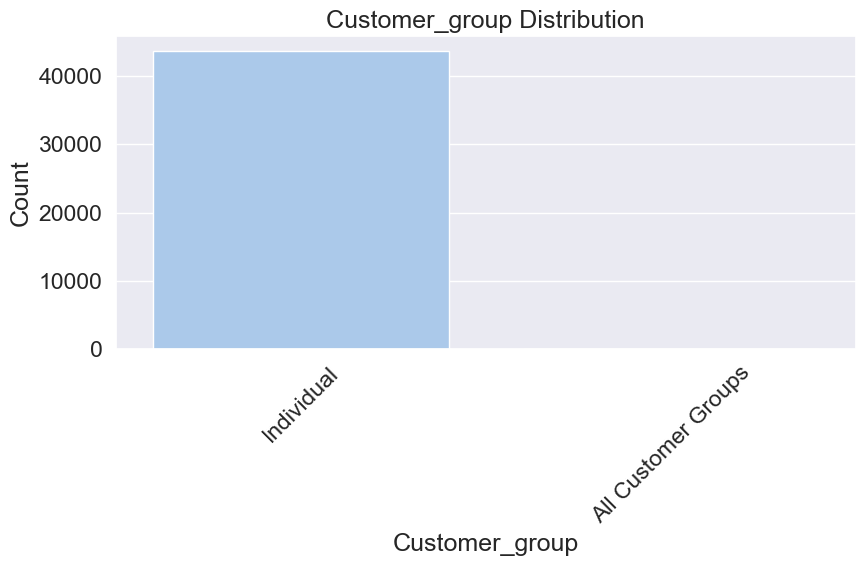

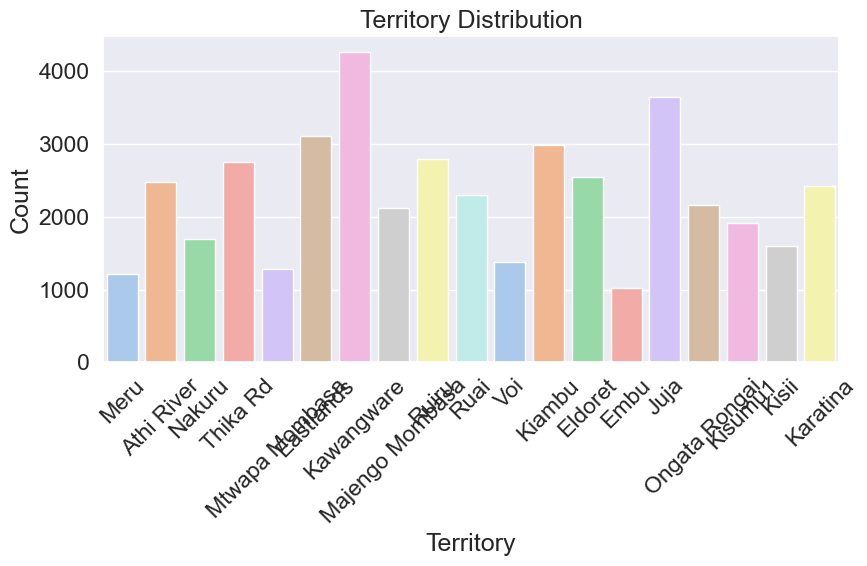

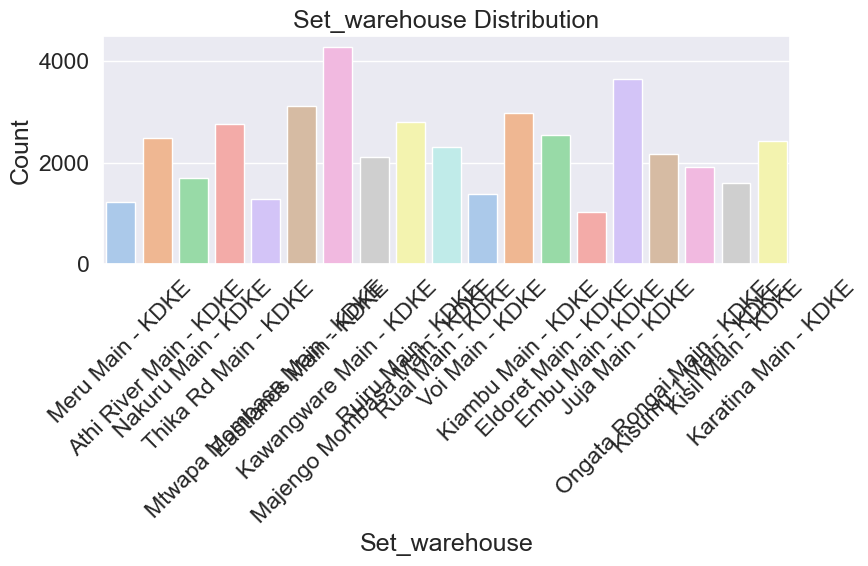

In [21]:
for col in Categorical_columns:
    plt.figure(figsize=(9, 6))
    sns.countplot(data=data, x=col, palette='pastel')
    plt.title(f"{col.capitalize()} Distribution")
    plt.xlabel(col.capitalize())
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()



##### Categorical Data vs Target

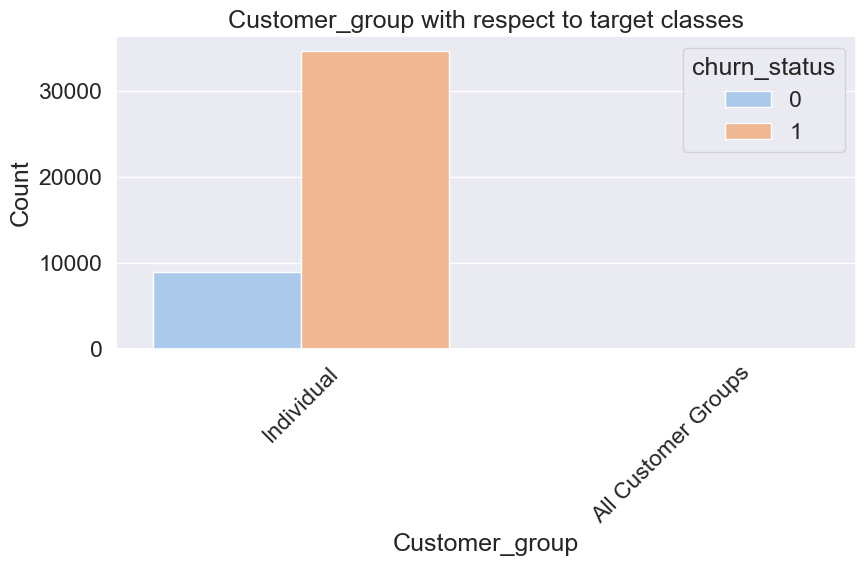

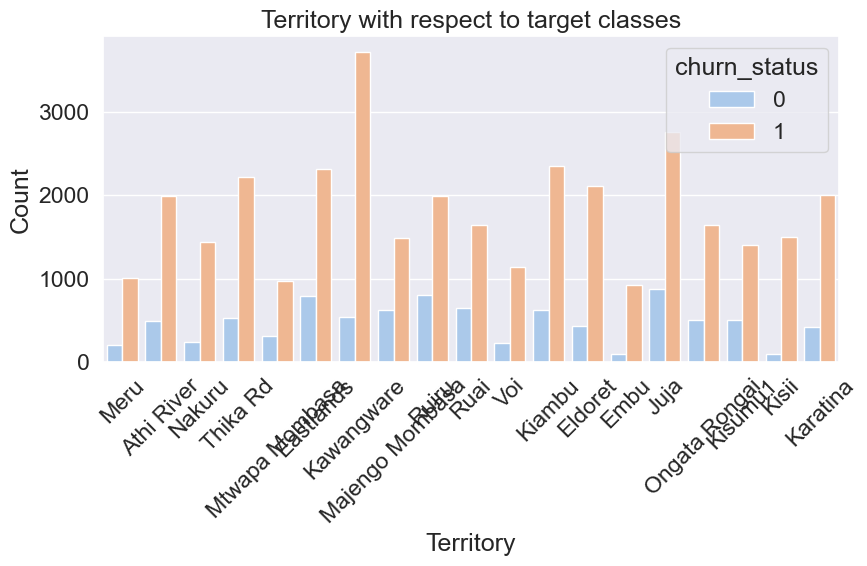

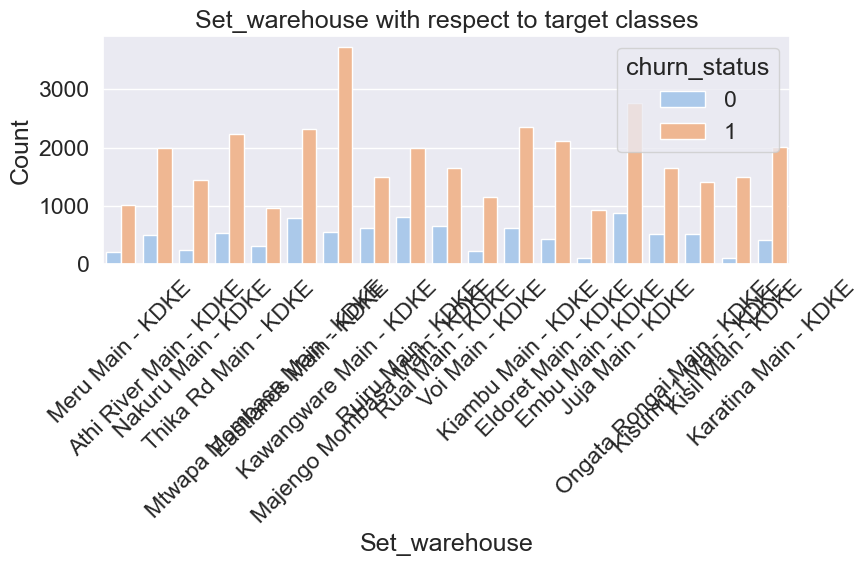

In [22]:
for col in Categorical_columns:
    plt.figure(figsize=(9, 6))
    sns.countplot(data=data, x=col, hue='churn_status', palette='pastel')
    plt.title(f"{col.capitalize()} with respect to target classes")
    plt.xlabel(col.capitalize())
    plt.ylabel('Count')
    plt.legend(title='churn_status', loc='upper right')
    plt.xticks(rotation=45)
    plt.tight_layout()  
    plt.show()



## Distribution of numerical features
Numerical columns: ['total_qty', 'net_total', 'discount_amount', 'duka_latitude', 'duka_longitude']

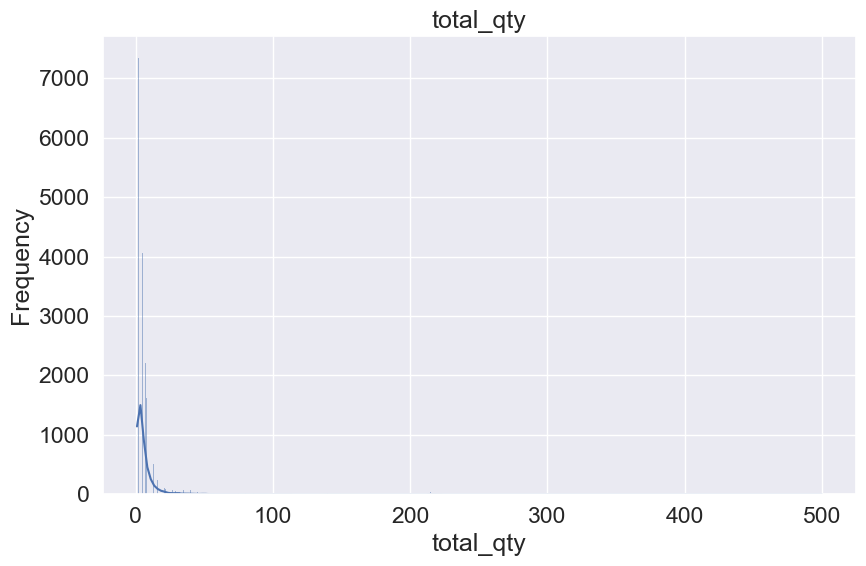

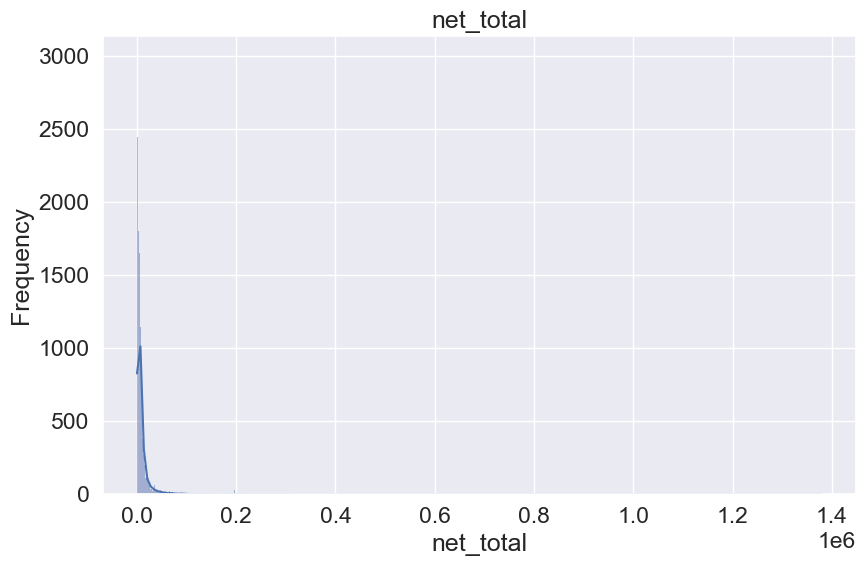

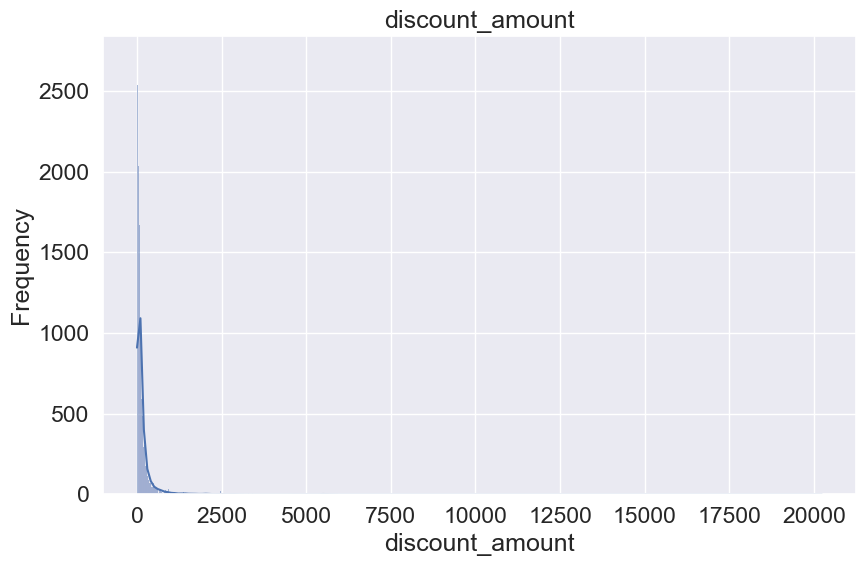

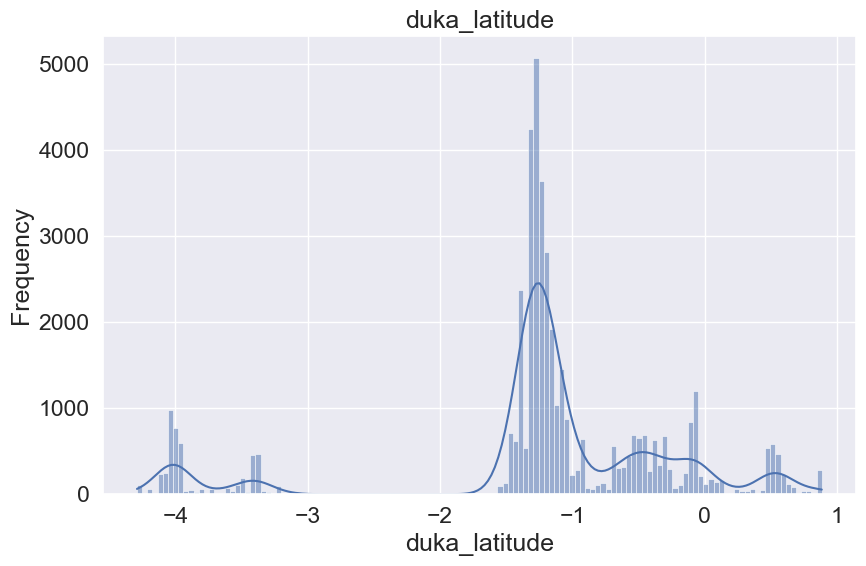

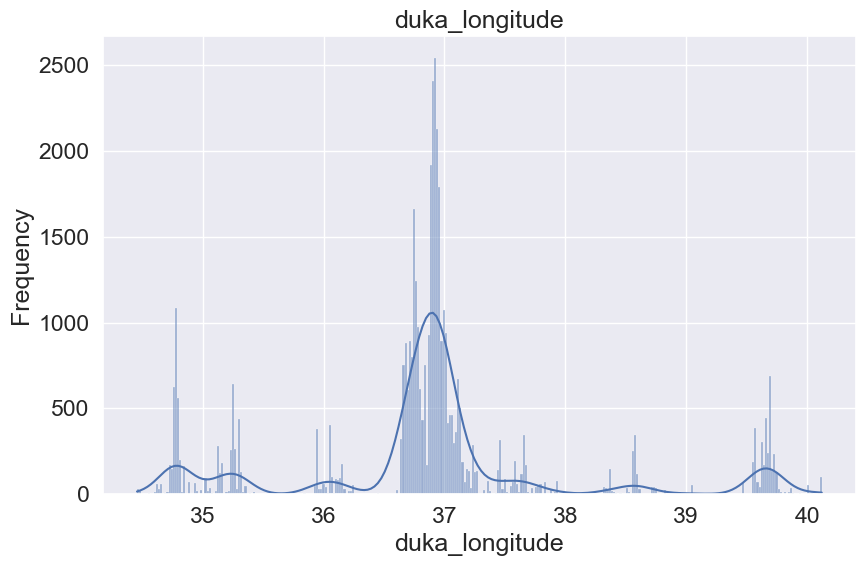

In [23]:
for col in Numerical_columns:
    plt.figure(figsize=(9, 6))  
    sns.histplot(x=col, data=data, kde=True, palette='pastel')
    plt.title(f"{col}")
    plt.xlabel(f"{col}")
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()



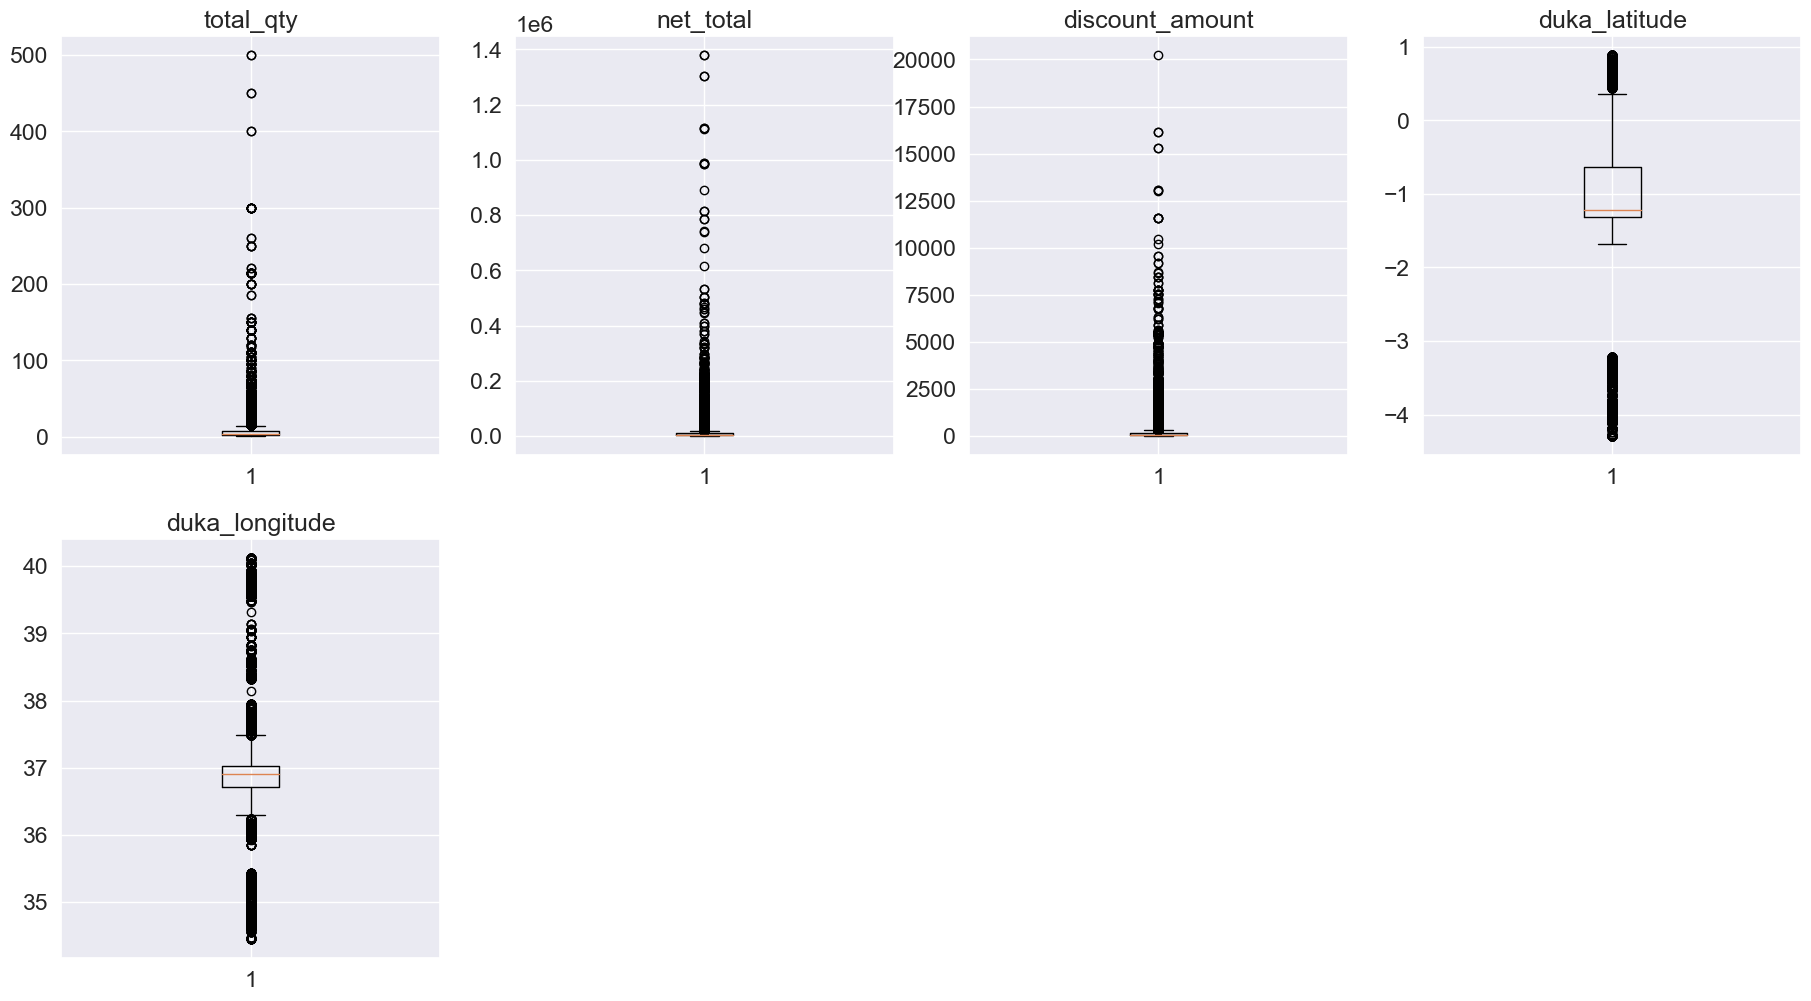

In [24]:
# Visualize the outliers using box plot
plt.figure(figsize=(20,30))
i = 1
columns_desc = ['total_qty', 'net_total', 'discount_amount', 'duka_latitude', 'duka_longitude']
for col in Numerical_columns:
    plt.subplot(5, 4, i)
    plt.boxplot(data[col], whis=1.5)
    plt.title(f'{col}')
    i += 1

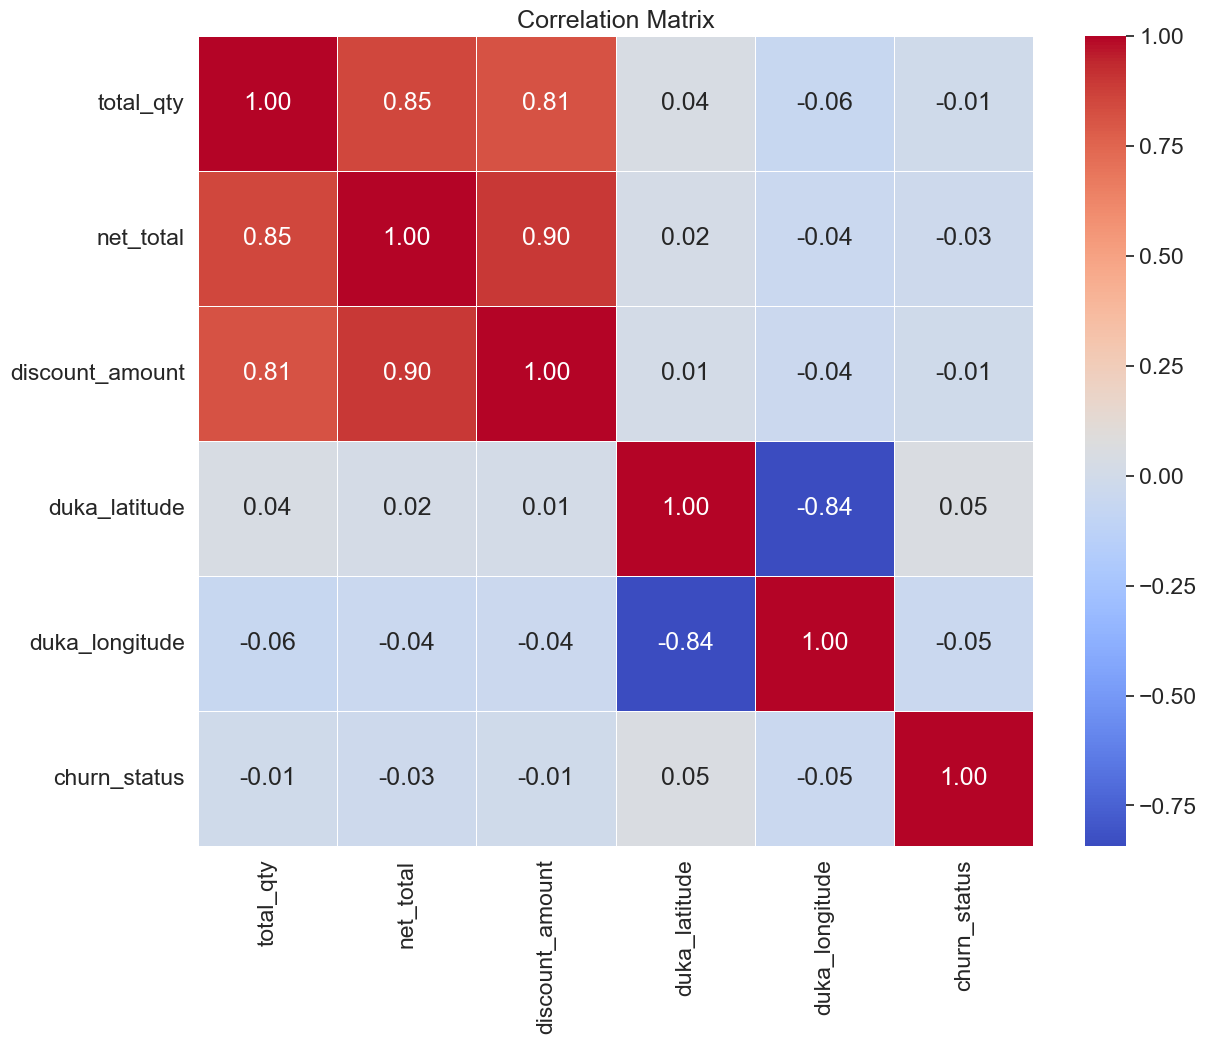

In [25]:
correlation_matrix = data.corr(method='pearson')
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


## Data preprocessing 

In [26]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler, OrdinalEncoder, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_validate, learning_curve, RandomizedSearchCV,GridSearchCV, StratifiedKFold, cross_val_score, cross_val_predict,KFold
from sklearn.metrics import accuracy_score, precision_score,make_scorer, recall_score, f1_score, classification_report, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

#### Encoding

In [27]:
le = LabelEncoder()

le_columns = ['customer_group', 'territory','set_warehouse']


## Count of unique features
for col in le_columns:
   data[col] = le.fit_transform(data[col])

In [28]:
data

,transaction_date,total_qty,net_total,discount_amount,customer_group,territory,delivery_date,delivery_window_end_time,delivery_window_start_time,set_warehouse,duka_latitude,duka_longitude,churn_status
0,2022-03-28,6,2231.57,66.38,1,11,2022-03-29,2024-08-13 19:00:00,2024-08-13 13:00:00,11,0.036784,37.654155,0
1,2022-03-28,6,2231.57,66.38,1,11,2022-03-29,2024-08-13 19:00:00,2024-08-13 13:00:00,11,0.036784,37.654155,0
2,2022-03-28,6,2231.57,66.38,1,11,2022-03-29,2024-08-13 19:00:00,2024-08-13 13:00:00,11,0.036784,37.654155,0
3,2022-12-03,5,3637.91,38.53,1,11,2022-03-14,2024-08-13 14:00:00,2024-08-13 08:00:00,11,0.036784,37.654155,0
4,2022-12-03,5,3637.91,38.53,1,11,2022-03-14,2024-08-13 14:00:00,2024-08-13 08:00:00,11,0.036784,37.654155,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43713,2022-03-15,2,1194.83,14.00,1,5,2022-03-16,2024-08-13 14:00:00,2024-08-13 08:00:00,5,-0.564060,37.074678,1
43714,2022-02-21,4,6874.52,80.55,1,5,2022-02-22,2024-08-13 14:00:00,2024-08-13 08:00:00,5,-0.564060,37.074678,1
43715,2022-02-21,4,6874.52,80.55,1,5,2022-02-22,2024-08-13 14:00:00,2024-08-13 08:00:00,5,-0.564060,37.074678,1
43716,2022-02-21,4,6874.52,80.55,1,5,2022-02-22,2024-08-13 14:00:00,2024-08-13 08:00:00,5,-0.564060,37.074678,1


In [29]:
## dropping a few more columns 
data = data.drop(['delivery_date','delivery_window_end_time','delivery_window_start_time','transaction_date'],axis=1)
data

,total_qty,net_total,discount_amount,customer_group,territory,set_warehouse,duka_latitude,duka_longitude,churn_status
0,6,2231.57,66.38,1,11,11,0.036784,37.654155,0
1,6,2231.57,66.38,1,11,11,0.036784,37.654155,0
2,6,2231.57,66.38,1,11,11,0.036784,37.654155,0
3,5,3637.91,38.53,1,11,11,0.036784,37.654155,0
4,5,3637.91,38.53,1,11,11,0.036784,37.654155,0
...,...,...,...,...,...,...,...,...,...
43713,2,1194.83,14.00,1,5,5,-0.564060,37.074678,1
43714,4,6874.52,80.55,1,5,5,-0.564060,37.074678,1
43715,4,6874.52,80.55,1,5,5,-0.564060,37.074678,1
43716,4,6874.52,80.55,1,5,5,-0.564060,37.074678,1


#### Splitting Data into Training and Testing Sets

In [30]:
X = data.drop('churn_status',axis=1)
y = data['churn_status']
print(X.shape)
print(y.shape)
     


(43708, 8)
(43708,)


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [32]:
y_train.value_counts()

1    27753
0     7213
Name: churn_status, dtype: int64

## Handling class imbalance in the Target variable

In [33]:
!pip install imbalanced-learn


In [34]:
from imblearn.over_sampling import RandomOverSampler

# Randomly over sample the minority class
ros = RandomOverSampler(sampling_strategy=1)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

In [35]:
y_train_ros.value_counts()

1    27753
0    27753
Name: churn_status, dtype: int64

#### Standardization

In [36]:
#Standardizing the oversampled target class
scaler = StandardScaler()
scaler.fit_transform(X_train_ros)
X_test = scaler.transform(X_test)


## Model building

In [37]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boost": GradientBoostingClassifier(),
    "Adaboost": AdaBoostClassifier(),
    "Xgboost": XGBClassifier()
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train_ros, y_train_ros)  # Train model with oversampled data

    # Make predictions
    y_train_pred = model.predict(X_train_ros)
    y_test_pred = model.predict(X_test)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train_ros, y_train_pred)  # Calculate Accuracy
    model_train_f1 = f1_score(y_train_ros, y_train_pred, average='weighted')  # Calculate F1-score
    model_train_precision = precision_score(y_train_ros, y_train_pred)  # Calculate Precision
    model_train_recall = recall_score(y_train_ros, y_train_pred)  # Calculate Recall
    model_train_rocauc_score = roc_auc_score(y_train_ros, y_train_pred)

    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred)  # Calculate Accuracy
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted')  # Calculate F1-score
    model_test_precision = precision_score(y_test, y_test_pred)  # Calculate Precision
    model_test_recall = recall_score(y_test, y_test_pred)  # Calculate Recall
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred)  # Calculate Roc AUC Score
    
    print(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

    print('----------------------------------')

    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))

    print('='*35)
    print('\n')


Logistic Regression
Model performance for Training set
- Accuracy: 0.5432
- F1 score: 0.5430
- Precision: 0.5414
- Recall: 0.5660
- Roc Auc Score: 0.5432
----------------------------------
Model performance for Test set
- Accuracy: 0.5458
- F1 score: 0.5887
- Precision: 0.8138
- Recall: 0.5537
- Roc Auc Score: 0.5346


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 0.9999
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.7927
- F1 score: 0.7011
- Precision: 0.7927
- Recall: 1.0000
- Roc Auc Score: 0.5000


Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 0.9999
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.7927
- F1 score: 0.7011
- Precision: 0.7927
- Recall: 1.0000
- Roc Auc Score: 0.5000


Gradient Boost
Model performance for Training set

#### Cross validation

In [38]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import make_scorer, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

# Define the models
models = {
    "Logistic Regression": LogisticRegression(max_iter=10000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boost": GradientBoostingClassifier(),
    "Adaboost": AdaBoostClassifier(),
    "Xgboost": XGBClassifier()
}

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=5)

# Define scoring metrics
scoring = {
    'accuracy': 'accuracy',
    'f1': make_scorer(f1_score, average='weighted'),
    'precision': 'precision',
    'recall': 'recall',
    'roc_auc': 'roc_auc'
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model_name = list(models.keys())[i]

    # Perform cross-validation and print results
    print(f"{model_name} - Cross-validation on Oversampled Data:")
    for score_name, score_func in scoring.items():
        cv_scores = cross_val_score(model, X_train_ros, y_train_ros, cv=skf, scoring=score_func)
        print(f"{score_name.capitalize()} (CV): {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")
    print('='*35)

    # Train model with oversampled data
    model.fit(X_train_ros, y_train_ros)

    # Make predictions
    y_train_pred = model.predict(X_train_ros)
    y_test_pred = model.predict(X_test)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train_ros, y_train_pred)  # Calculate Accuracy
    model_train_f1 = f1_score(y_train_ros, y_train_pred, average='weighted')  # Calculate F1-score
    model_train_precision = precision_score(y_train_ros, y_train_pred)  # Calculate Precision
    model_train_recall = recall_score(y_train_ros, y_train_pred)  # Calculate Recall
    model_train_rocauc_score = roc_auc_score(y_train_ros, y_train_pred)

    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred)  # Calculate Accuracy
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted')  # Calculate F1-score
    model_test_precision = precision_score(y_test, y_test_pred)  # Calculate Precision
    model_test_recall = recall_score(y_test, y_test_pred)  # Calculate Recall
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred)  # Calculate Roc AUC Score
    
    print(model_name)

    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

    print('----------------------------------')

    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))

    print('='*35)
    print('\n')

Logistic Regression - Cross-validation on Oversampled Data:
Accuracy (CV): 0.5374 (+/- 0.0072)
F1 (CV): 0.5347 (+/- 0.0119)
Precision (CV): 0.5380 (+/- 0.0028)
Recall (CV): 0.5255 (+/- 0.0803)
Roc_auc (CV): 0.5442 (+/- 0.0076)
Logistic Regression
Model performance for Training set
- Accuracy: 0.5432
- F1 score: 0.5430
- Precision: 0.5414
- Recall: 0.5660
- Roc Auc Score: 0.5432
----------------------------------
Model performance for Test set
- Accuracy: 0.5458
- F1 score: 0.5887
- Precision: 0.8138
- Recall: 0.5537
- Roc Auc Score: 0.5346


Decision Tree - Cross-validation on Oversampled Data:
Accuracy (CV): 0.9934 (+/- 0.0014)
F1 (CV): 0.9937 (+/- 0.0010)
Precision (CV): 0.9994 (+/- 0.0007)
Recall (CV): 0.9875 (+/- 0.0014)
Roc_auc (CV): 0.9935 (+/- 0.0011)
Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 0.9999
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.792

##### Model Prediction 

In [39]:
random_forest = RandomForestClassifier()

# Fit the model on the oversampled training data
random_forest.fit(X_train_ros, y_train_ros)

# Make predictions on the test data
y_test_pred = random_forest.predict(X_test)

# Print the predictions
print("Random Forest Predictions:")
print(y_test_pred)


Random Forest Predictions:
[1 1 1 ... 1 1 1]


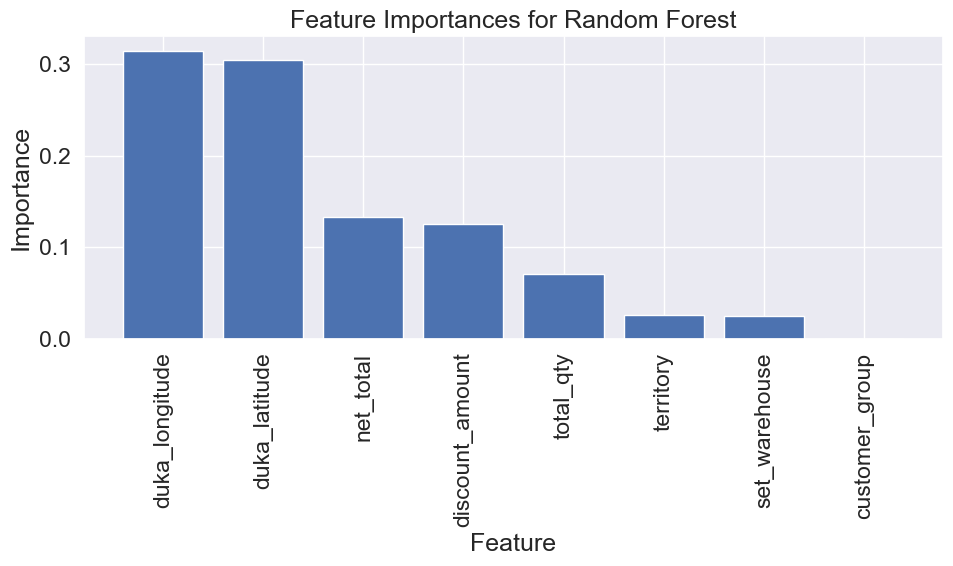

In [40]:
for i in range(len(list(models))):
    model = list(models.values())[i]
    model_name = list(models.keys())[i]

    # Train the Random Forest model
    if model_name == "Random Forest":
        model.fit(X_train_ros, y_train_ros)  

        # Calculate feature importances
        feature_importances = model.feature_importances_
        sorted_idx = np.argsort(feature_importances)[::-1]
        features = X_train_ros.columns if hasattr(X_train_ros, 'columns') else range(len(feature_importances))
        sorted_features = [features[i] for i in sorted_idx]

        # Plot the feature importances
        plt.figure(figsize=(10, 6))
        plt.bar(range(len(feature_importances)), feature_importances[sorted_idx], align='center')
        plt.xticks(range(len(feature_importances)), sorted_features, rotation=90)
        plt.title(f"Feature Importances for {model_name}")
        plt.xlabel("Feature")
        plt.ylabel("Importance")
        plt.tight_layout()
        plt.show()


In [41]:
my_sub.to_csv('Submission_Q2',index=False)

# Ideas on how to reduce churn Rate 

- Use customer data to tailor communication, offers, and product recommendations, making customers feel valued and understood.
- Implement or enhance loyalty programs that reward repeat purchases, incentivizing customers to stay engaged and reduce the likelihood of churn.
- Identify early signs of customer dissatisfaction (e.g., decreased activity, negative feedback) and address them through targeted support or special offers to re-engage at-risk customers.

